## `Housing Prediction Kaggle Project`

In [2]:
#Importing libraries
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost
import pandas as pd
import numpy as np
from scipy.stats import norm
import warnings
warnings.filterwarnings('ignore')

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/matplotlib/__init__.py:886: MatplotlibDeprecationWarning: 
examples.directory is deprecated; in the future, examples will be found relative to the 'datapath' directory.
  "found relative to the 'datapath' directory.".format(key))


### Importing test and train datasets

In [3]:
train = pd.read_csv('data/train.csv',index_col = 'Id')
test = pd.read_csv('data/test.csv',index_col = 'Id')

### Shape of the Datasets

In [4]:
test.shape

(1459, 79)

In [5]:
train.shape

(1460, 80)

### Getting information about dataset

In [6]:
#train.info()
#test.info()

In [7]:
train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


List  of all the features

In [8]:
train.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'Wo

**Information about Features**

* SalePrice - the property's sale price in dollars. This is the target variable that you're trying to predict.
* MSSubClass: The building class
* MSZoning: The general zoning classification
* LotFrontage: Linear feet of street connected to property
* LotArea: Lot size in square feet
* Street: Type of road access
* Alley: Type of alley access
* LotShape: General shape of property
* LandContour: Flatness of the property
* Utilities: Type of utilities available
* LotConfig: Lot configuration
* LandSlope: Slope of property
* Neighborhood: Physical locations within Ames city limits
* Condition1: Proximity to main road or railroad
* Condition2: Proximity to main road or railroad (if a second is present)
* BldgType: Type of dwelling
* HouseStyle: Style of dwelling
* OverallQual: Overall material and finish quality
* OverallCond: Overall condition rating
* YearBuilt: Original construction date
* YearRemodAdd: Remodel date
* RoofStyle: Type of roof
* RoofMatl: Roof material
* Exterior1st: Exterior covering on house
* Exterior2nd: Exterior covering on house (if more than one material)
* MasVnrType: Masonry veneer type
* MasVnrArea: Masonry veneer area in square feet
* ExterQual: Exterior material quality
* ExterCond: Present condition of the material on the exterior
* Foundation: Type of foundation
* BsmtQual: Height of the basement
* BsmtCond: General condition of the basement
* BsmtExposure: Walkout or garden level basement walls
* BsmtFinType1: Quality of basement finished area
* BsmtFinSF1: Type 1 finished square feet
* BsmtFinType2: Quality of second finished area (if present)
* BsmtFinSF2: Type 2 finished square feet
* BsmtUnfSF: Unfinished square feet of basement area
* TotalBsmtSF: Total square feet of basement area
* Heating: Type of heating
* HeatingQC: Heating quality and condition
* CentralAir: Central air conditioning
* Electrical: Electrical system
* 1stFlrSF: First Floor square feet
* 2ndFlrSF: Second floor square feet
* LowQualFinSF: Low quality finished square feet (all floors)
* GrLivArea: Above grade (ground) living area square feet
* BsmtFullBath: Basement full bathrooms
* BsmtHalfBath: Basement half bathrooms
* FullBath: Full bathrooms above grade
* HalfBath: Half baths above grade
* Bedroom: Number of bedrooms above basement level
* Kitchen: Number of kitchens
* KitchenQual: Kitchen quality
* TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)
* Functional: Home functionality rating
* Fireplaces: Number of fireplaces
* FireplaceQu: Fireplace quality
* GarageType: Garage location
* GarageYrBlt: Year garage was built
* GarageFinish: Interior finish of the garage
* GarageCars: Size of garage in car capacity
* GarageArea: Size of garage in square feet
* GarageQual: Garage quality
* GarageCond: Garage condition
* PavedDrive: Paved driveway
* WoodDeckSF: Wood deck area in square feet
* OpenPorchSF: Open porch area in square feet
* EnclosedPorch: Enclosed porch area in square feet
* 3SsnPorch: Three season porch area in square feet
* ScreenPorch: Screen porch area in square feet
* PoolArea: Pool area in square feet
* PoolQC: Pool quality
* Fence: Fence quality
* MiscFeature: Miscellaneous feature not covered in other categories
* MiscVal: $Value of miscellaneous feature
* MoSold: Month Sold
* YrSold: Year Sold
* SaleType: Type of sale
* SaleCondition: Condition of sale


### To get the descriptive statistics about the data

In [9]:
train.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


### Selecting numerical and categorical features

In [10]:
num_feat=train.select_dtypes(include=[np.number])
cat_feat=train.select_dtypes(include=[np.object])
print('Numerical Features:\n',num_feat.dtypes,'\n')
print('Categorical Features:\n',cat_feat.dtypes)

Numerical Features:
 MSSubClass         int64
LotFrontage      float64
LotArea            int64
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
MasVnrArea       float64
BsmtFinSF1         int64
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
1stFlrSF           int64
2ndFlrSF           int64
LowQualFinSF       int64
GrLivArea          int64
BsmtFullBath       int64
BsmtHalfBath       int64
FullBath           int64
HalfBath           int64
BedroomAbvGr       int64
KitchenAbvGr       int64
TotRmsAbvGrd       int64
Fireplaces         int64
GarageYrBlt      float64
GarageCars         int64
GarageArea         int64
WoodDeckSF         int64
OpenPorchSF        int64
EnclosedPorch      int64
3SsnPorch          int64
ScreenPorch        int64
PoolArea           int64
MiscVal            int64
MoSold             int64
YrSold             int64
SalePrice          int64
dtype: object 

Categorical Features:
 MSZoning       

### Target Analysis

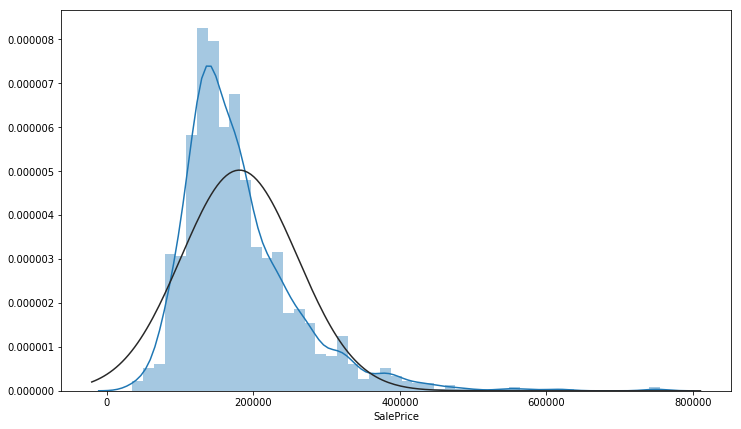

In [11]:
plt.figure(figsize=(12,7))
sns.distplot(train['SalePrice'],fit = norm);

In [12]:
train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

#### Skewness:

#### Kurtosis:



***So we can see that our Target variable is positively skewed and is leptokurtic.***

In [13]:
#Skewness and Kurtosis for Target Variable
print('Skewness :',train['SalePrice'].skew())
print('Kurtosis :',train['SalePrice'].kurt())

Skewness : 1.8828757597682129
Kurtosis : 6.536281860064529


### To reduce the skewness we'll take log of SalePrice
**And the skewness for the logSalePrice is 0.12 which is very close to normal**

Skewness =  0.12133506220520406


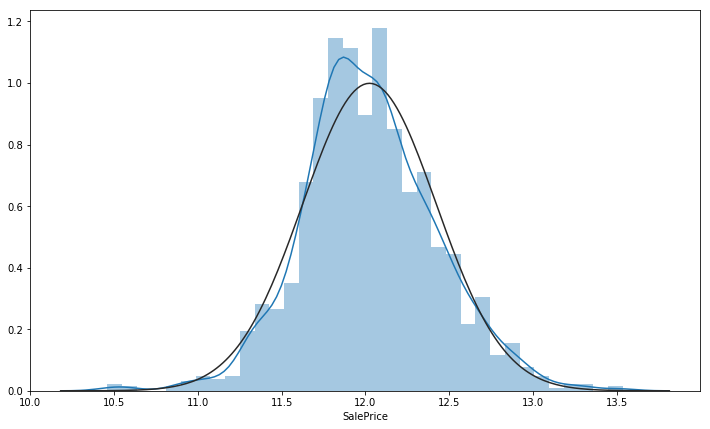

In [14]:
plt.figure(figsize = (12,7))
sns.distplot(np.log(train.SalePrice),fit = norm);
print('Skewness = ',np.log(train.SalePrice).skew())

### Checking Correlations

In [15]:
train.corr()['SalePrice'].sort_values(ascending=False)

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePrice, dtype: float64

#### List of Highly correlated features : Here we'll visualize them and clean the outliers 

In [16]:
features = ['OverallQual','YearBuilt','YearRemodAdd','TotalBsmtSF','1stFlrSF',
                    'GrLivArea','FullBath','TotRmsAbvGrd','GarageCars','GarageArea']

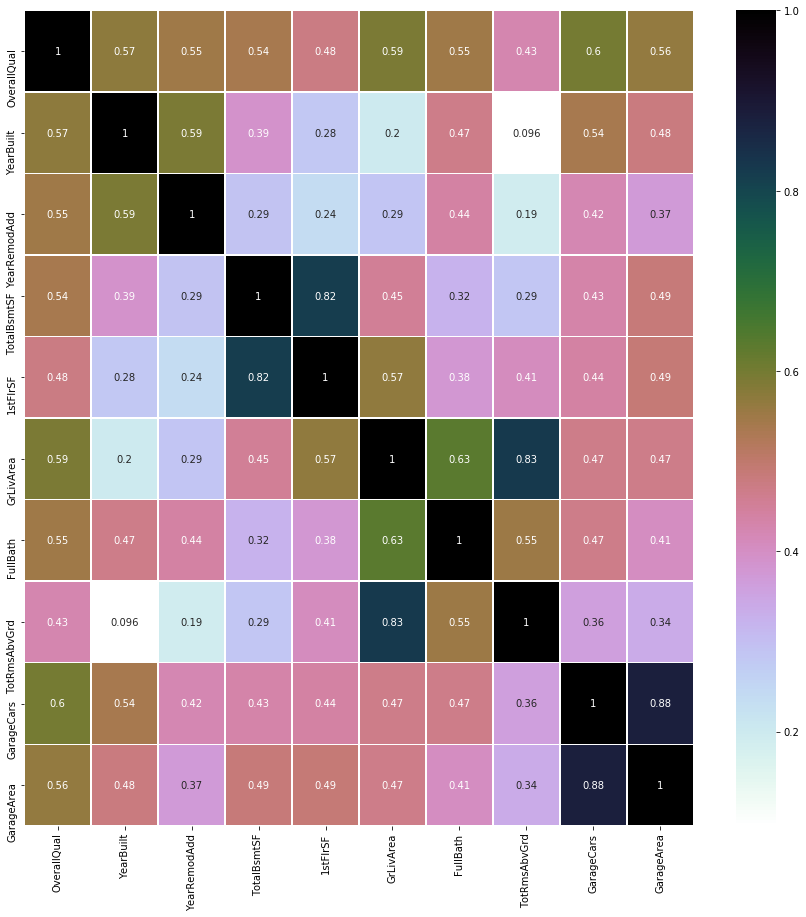

In [17]:
plt.figure(figsize = (15,15))
sns.heatmap(train[features].corr(),annot = True,linewidths = 0.5,cmap='cubehelix_r');
plt.savefig('Correlation Heatmap.png')

# Data Visualization

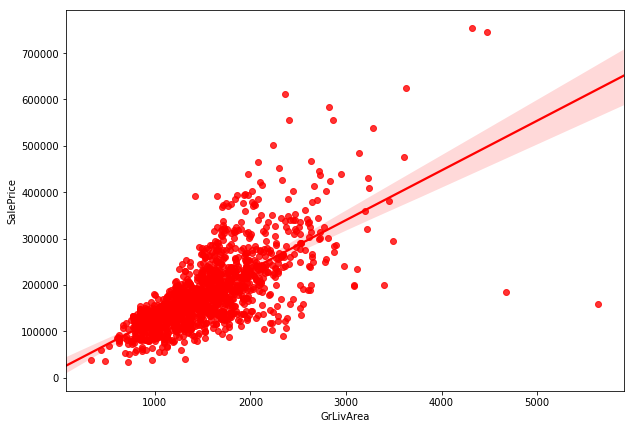

In [18]:
#Plotting regression plot for GrLivArea
plt.figure(figsize = (10,7))
sns.regplot('GrLivArea','SalePrice',data=train,color = 'red');


**Outliers affect the mean value of the data but have little effect on the median or mode of a given set of data.**
We can see that there are outliers. So we'll remove them and take GrLivArea till 4000.

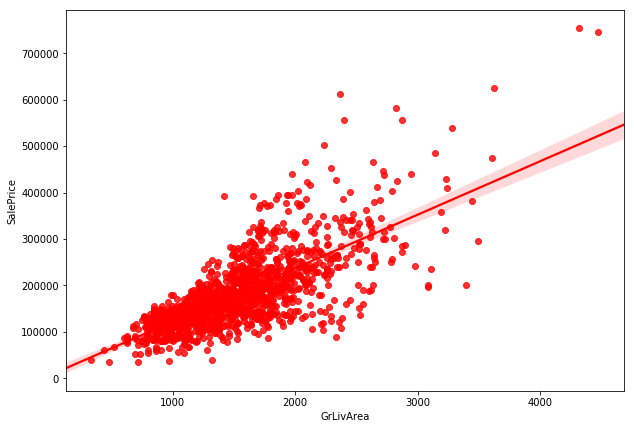

In [19]:
train = train.drop(train[(train['GrLivArea']>4000) & (train['SalePrice']<300000)].index)
plt.figure(figsize = (10,7))
sns.regplot('GrLivArea','SalePrice',data=train,color = 'red');

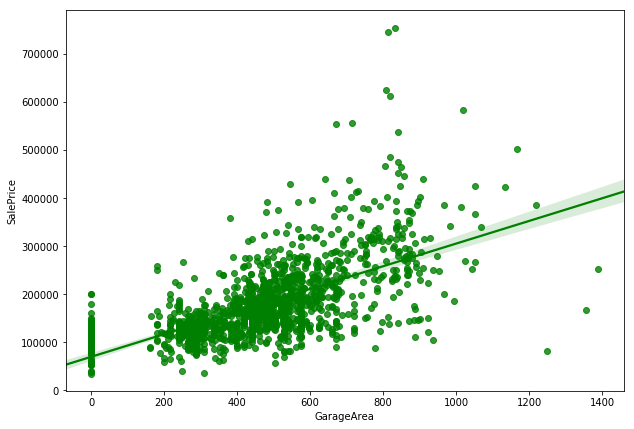

In [20]:
#Visualizing Garage Area
plt.figure(figsize=(10,7))
sns.regplot('GarageArea','SalePrice',data=train,color='green');

**The error seems to have constant variance till GarageArea=1000 but we after that it's dipersed and it can create huge problem in analysis. So we'll remove the outliers from here.**

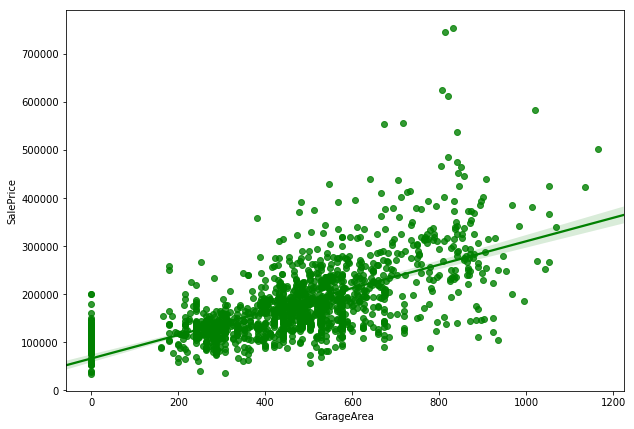

In [21]:
#Removing Outliers from the GarageArea
train = train[train['GarageArea']<1200]
plt.figure(figsize=(10,7))
sns.regplot('GarageArea','SalePrice',data=train,color='green');

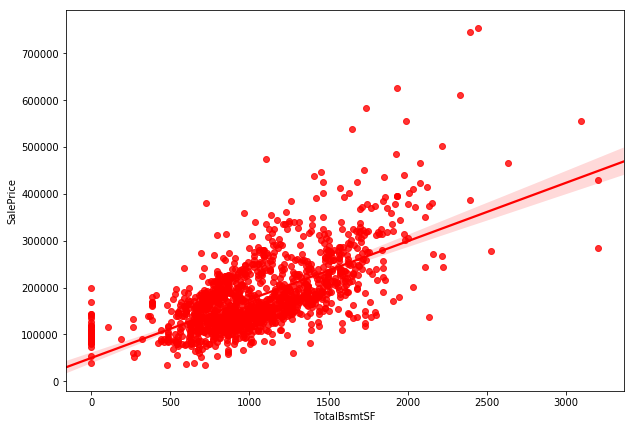

In [22]:
#Visualizing TotalBsmtSF
plt.figure(figsize=(10,7))
sns.regplot('TotalBsmtSF','SalePrice',data=train,color='Red');

**Combined '1stFlrSf' and '2ndFlrSF' has a better relationship with SalePrice than both of them alone**

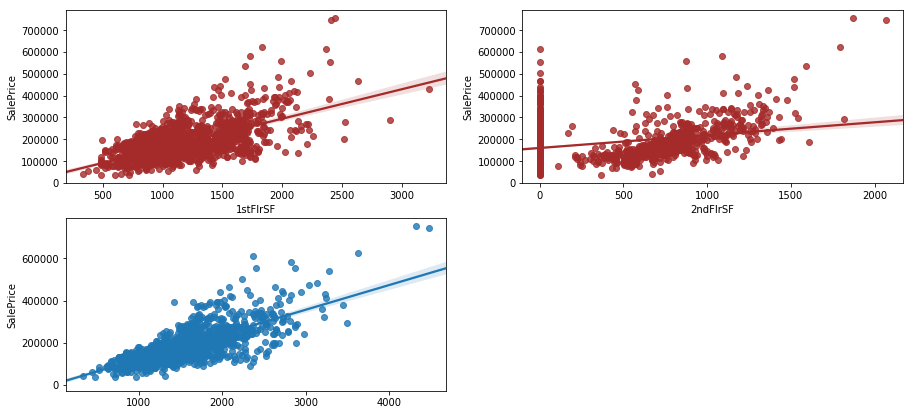

In [23]:
plt.figure(figsize=(15,7))
plt.subplot(221)
sns.regplot('1stFlrSF','SalePrice',data=train,color = 'Brown');
plt.subplot(222)
sns.regplot('2ndFlrSF','SalePrice',data=train,color = 'Brown');
plt.subplot(223)
sns.regplot(train['1stFlrSF'] + train['2ndFlrSF'],train['SalePrice']);


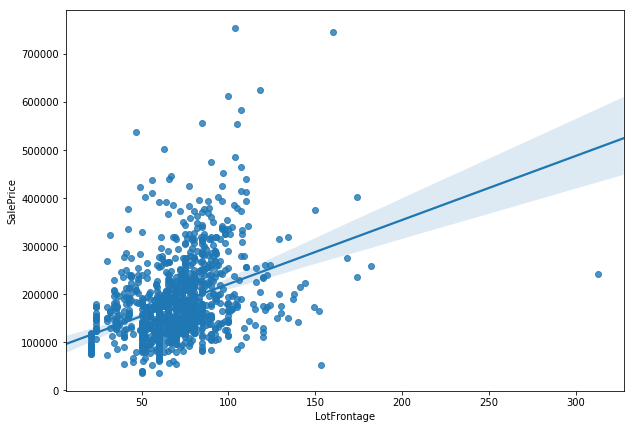

In [24]:
plt.figure(figsize=(10,7))
sns.regplot('LotFrontage','SalePrice',data=train);  #we can see the outliers here

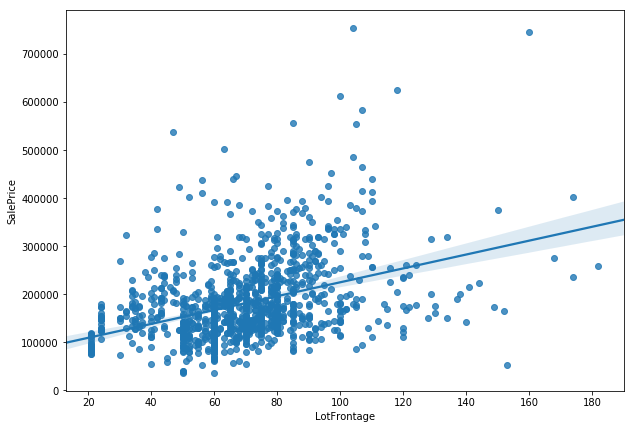

In [25]:
train = train[train['LotFrontage']<200]   ##Removing Outliers
plt.figure(figsize=(10,7))
sns.regplot('LotFrontage','SalePrice',data=train);

### This plot shows that as Overall Quality for a house is increasing the median Sale Price is increasing.
**Also the maximum sought for house has an overall condition of 5.**

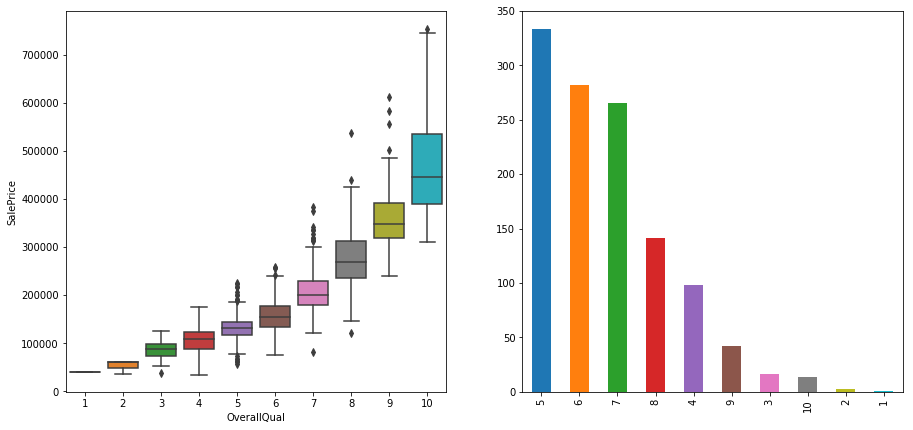

In [26]:
plt.figure(figsize= (15,7))
plt.subplot(121)
sns.boxplot(train['OverallQual'], train['SalePrice']);
plt.subplot(122)
train['OverallQual'].value_counts().plot(kind="bar");
plt.savefig('OverallQual Vs SalePrice.png')

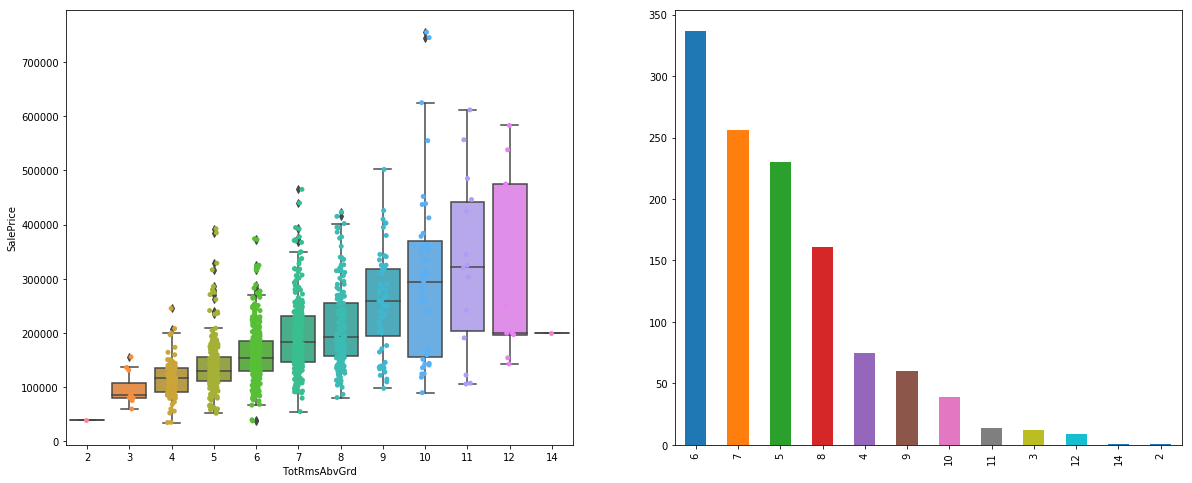

In [27]:
plt.figure(figsize= (20,8))
plt.subplot(121)
sns.boxplot(train['TotRmsAbvGrd'], train['SalePrice']);
sns.stripplot(train["TotRmsAbvGrd"],train["SalePrice"], jitter=True, edgecolor="gray")
plt.subplot(122)
train['TotRmsAbvGrd'].value_counts().plot(kind="bar");
plt.savefig('TotRmsAbvGrd Vs SalePrice.png')

#Sample size is decreasing after Total rooms above grade reaches to 10.

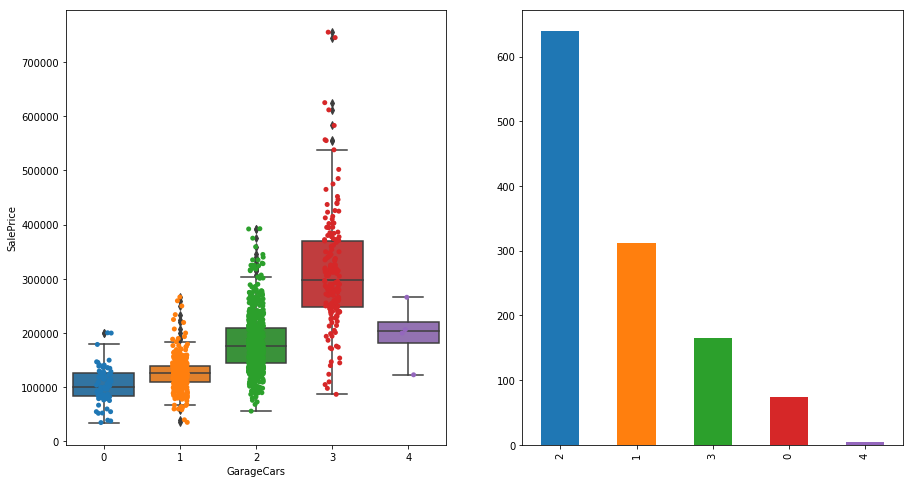

In [28]:
plt.figure(figsize= (15,8))
plt.subplot(121)
sns.boxplot(train['GarageCars'], train['SalePrice']);
sns.stripplot(train["GarageCars"],train["SalePrice"], jitter=True, edgecolor="gray")
plt.subplot(122)
train['GarageCars'].value_counts().plot(kind="bar");
plt.savefig('GarageCars Vs SalePrice.png')
#Median Sale Price going down after 4 Garagecars is undestandable after plotting the points on boxes.

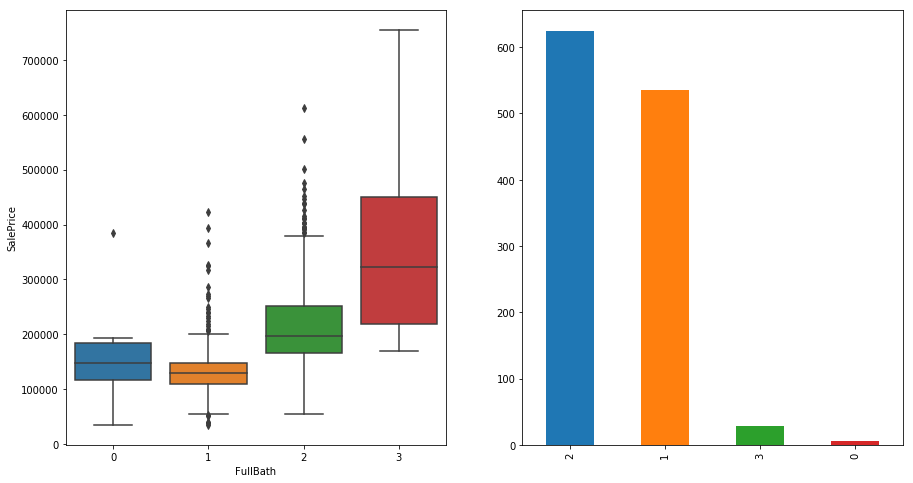

In [29]:
plt.figure(figsize= (15,8))
plt.subplot(121)
sns.boxplot(train['FullBath'], train['SalePrice']);
plt.subplot(122)
train['FullBath'].value_counts().plot(kind="bar");
plt.savefig('FullBath Vs SalePrice.png')

# Data Preprocessing and Cleaning

In [30]:
train['log_SalePrice']=np.log(train['SalePrice']+1)
saleprices=train[['SalePrice','log_SalePrice']]

saleprices.head(5)

,SalePrice,log_SalePrice
Id,,
1,208500,12.247699
2,181500,12.109016
3,223500,12.317171
4,140000,11.849405
5,250000,12.429220


In [31]:
train=train.drop(columns=['SalePrice','log_SalePrice'])

In [32]:
print(test.shape)
print(train.shape)

(1459, 79)
(1195, 79)


In [33]:
all_data = pd.concat((train, test))
print(all_data.shape)
all_data.head()

(2654, 79)


,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal


### Checking for NaN values in Data

In [34]:
null_data = pd.DataFrame(all_data.isnull().sum().sort_values(ascending=False))

null_data.columns = ['Null Count']
null_data.index.name = 'Feature'
null_data


,Null Count
Feature,
PoolQC,2646
MiscFeature,2565
Alley,2461
Fence,2136
FireplaceQu,1329
LotFrontage,227
GarageCond,152
GarageQual,152
GarageYrBlt,152


In [35]:
# Percentage of Null Data in each Feature

(null_data/len(all_data)) * 100

,Null Count
Feature,
PoolQC,99.698568
MiscFeature,96.646571
Alley,92.727958
Fence,80.482291
FireplaceQu,50.075358
LotFrontage,8.553127
GarageCond,5.727204
GarageQual,5.727204
GarageYrBlt,5.727204


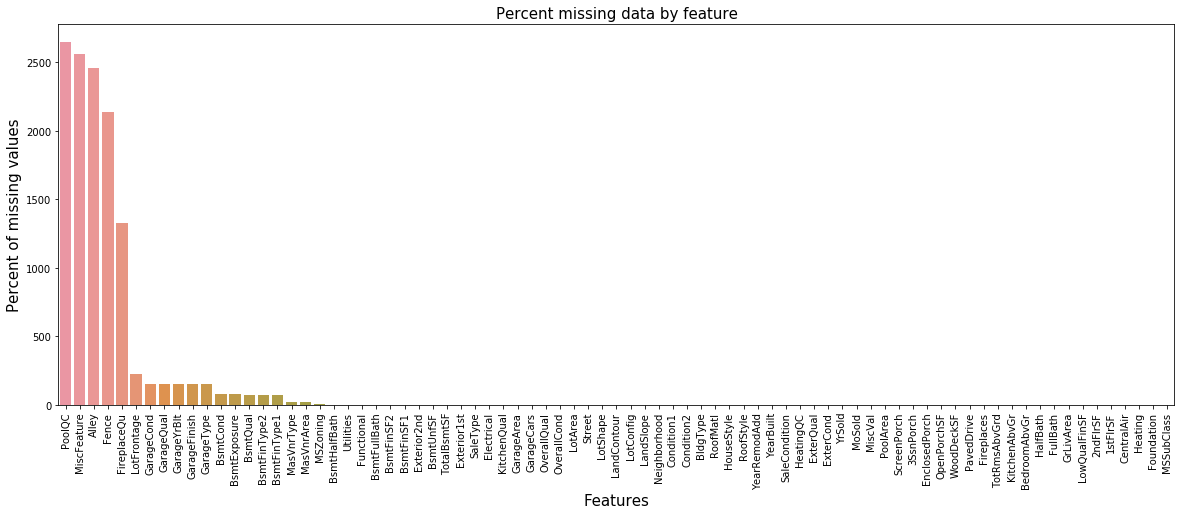

In [36]:
# Visualising missing data
f, ax = plt.subplots(figsize=(20, 7));
plt.xticks(rotation='90');
sns.barplot(x=null_data.index, y=null_data['Null Count']);
plt.xlabel('Features', fontsize=15);
plt.ylabel('Percent of missing values', fontsize=15);
plt.title('Percent missing data by feature', fontsize=15);

## Imputing Missing Values
#### In the below column, we have most of the values missing so we'll impute them with 'None'

In [37]:
for col in ('PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
            'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'MasVnrType', 'MSSubClass'):
    
    all_data[col] = all_data[col].fillna('None')

#### In these numerical features we'll impute NaN with zero because a missing values here means the house doesn't have that feature so it's zero

In [38]:
#Impute the numerical features and replace with a value of zero

for col in ('GarageYrBlt', 'GarageArea', 'GarageCars', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath',
            'BsmtHalfBath', 'MasVnrArea'):
    
    all_data[col] = all_data[col].fillna(0)

#### In the following features there are very less missing values so we'll impute them with the most frequent value.

In [39]:
for col in ('MSZoning', 'Electrical', 'KitchenQual', 'Exterior1st', 'Exterior2nd', 'SaleType', 'Functional', 'Utilities'):
    all_data[col] = all_data[col].fillna(all_data[col].mode()[0])

###### Imputing LotFrontage with median values

In [40]:
all_data['LotFrontage'] = all_data.groupby('Neighborhood')['LotFrontage'].apply(lambda x: x.fillna(x.median()))


### Combining similar features to make new features

**TotalBsmtSF** - Total Basement Square Feet

**1stFlrSF** - First Floor Square Feet

**2ndFlrSF** - Second Floor Square Feet

All the above three feature define area of the house and we can easily combine these to form **TotalSF** - Total Area in square feet

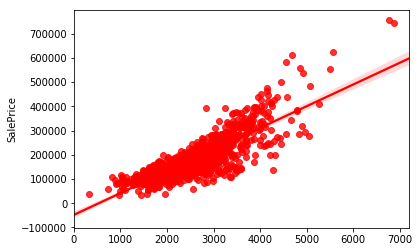

In [41]:
all_data['TotalSF']=all_data['TotalBsmtSF'] + all_data['1stFlrSF'] + all_data['2ndFlrSF']
all_data['No2ndFlr']=(all_data['2ndFlrSF']==0)
all_data['NoBsmt']=(all_data['TotalBsmtSF']==0)

sns.regplot(train['TotalBsmtSF']+train['1stFlrSF']+train['2ndFlrSF'],saleprices['SalePrice'],color='red');

 The **BsmtFullBath ,FullBath, BsmtHalfBath** can be combined for a **TotalBath** similar to TotalSF


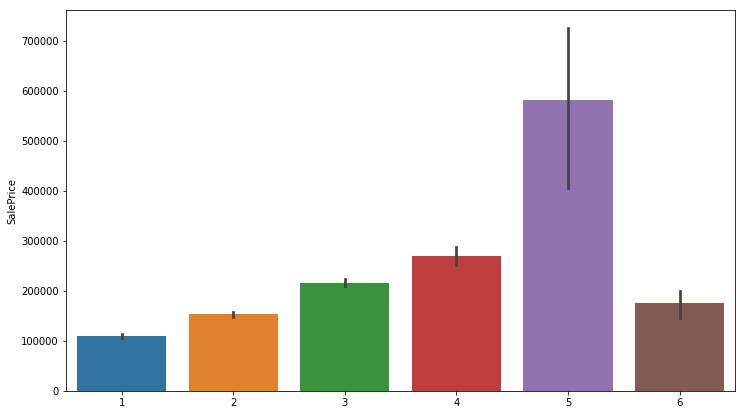

In [42]:
plt.figure(figsize = (12,7))
sns.barplot(train['BsmtFullBath'] + train['FullBath'] + train['BsmtHalfBath'] + train['HalfBath'], saleprices['SalePrice']);

all_data['TotalBath']=all_data['BsmtFullBath'] + all_data['FullBath'] + all_data['BsmtHalfBath'] + all_data['HalfBath']

#### Combining YearBuilt and YearRemodAdd

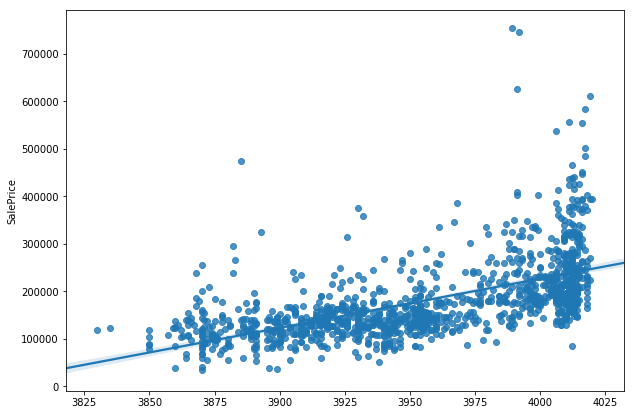

In [43]:
plt.figure(figsize=(10,7))
sns.regplot((train['YearBuilt']+train['YearRemodAdd']), saleprices['SalePrice']);

all_data['YrBltAndRemod']=all_data['YearBuilt']+all_data['YearRemodAdd']

#### These features are not much related to the SalePrice so we'll drop them.

In [44]:
all_data=all_data.drop(columns=['Street','Utilities','Condition2','RoofMatl',
                                'Heating','PoolArea','PoolQC','MiscVal','MiscFeature'])

In [45]:
# treat some numeric values as str which are infact a categorical variables
all_data['MSSubClass']=all_data['MSSubClass'].astype(str)
all_data['MoSold']=all_data['MoSold'].astype(str)
all_data['YrSold']=all_data['YrSold'].astype(str)

#### I found these features might look better without 0 data.

In [46]:
all_data['NoLowQual']=(all_data['LowQualFinSF']==0)
all_data['NoOpenPorch']=(all_data['OpenPorchSF']==0)
all_data['NoWoodDeck']=(all_data['WoodDeckSF']==0)
all_data['NoGarage']=(all_data['GarageArea']==0)

In [47]:
Basement = ['BsmtCond', 'BsmtExposure', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtFinType1',
            'BsmtFinType2', 'BsmtQual', 'BsmtUnfSF','TotalBsmtSF']

Bsmt=all_data[Basement]
Bsmt.head()

,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,BsmtFinType1,BsmtFinType2,BsmtQual,BsmtUnfSF,TotalBsmtSF
Id,,,,,,,,,
1,TA,No,706.0,0.0,GLQ,Unf,Gd,150.0,856.0
2,TA,Gd,978.0,0.0,ALQ,Unf,Gd,284.0,1262.0
3,TA,Mn,486.0,0.0,GLQ,Unf,Gd,434.0,920.0
4,Gd,No,216.0,0.0,ALQ,Unf,TA,540.0,756.0
5,TA,Av,655.0,0.0,GLQ,Unf,Gd,490.0,1145.0


In [48]:
Bsmt['BsmtCond'].unique()

array(['TA', 'Gd', 'None', 'Fa', 'Po'], dtype=object)

BsmtQual: Evaluates the height of the basement

*    Ex   Excellent (100+ inches) 
*    Gd   Good (90-99 inches)
*    TA   Typical (80-89 inches)
*    Fa   Fair (70-79 inches)
*    Po   Poor (&lt;70 inches
*    NA   No Basement
   
BsmtCond: Evaluates the general condition of the basement

*    Ex   Excellent
*    Gd   Good
*    TA   Typical - slight dampness allowed
*    Fa   Fair - dampness or some cracking or settling
*    Po   Poor - Severe cracking, settling, or wetness
*    NA   No Basement

BsmtExposure: Refers to walkout or garden level walls

*    Gd   Good Exposure
*    Av   Average Exposure (split levels or foyers typically score average or above)  
*    Mn   Mimimum Exposure
*    No   No Exposure
*    NA   No Basement

BsmtFinType1: Rating of basement finished area

*    GLQ  Good Living Quarters
*    ALQ  Average Living Quarters
*    BLQ  Below Average Living Quarters   
*    Rec  Average Rec Room
*    LwQ  Low Quality
*    Unf  Unfinshed
*    NA   No Basement

BsmtFinSF1: Type 1 finished square feet

BsmtFinType2: Rating of basement finished area (if multiple types)

*    GLQ  Good Living Quarters
*    ALQ  Average Living Quarters
*    BLQ  Below Average Living Quarters   
*    Rec  Average Rec Room
*    LwQ  Low Quality
*    Unf  Unfinshed
*    NA   No Basement

BsmtFinSF2: Type 2 finished square feet

BsmtUnfSF: Unfinished square feet of basement area

TotalBsmtSF: Total square feet of basement area   

In [49]:
Bsmt=Bsmt.replace(to_replace='Po', value=1)
Bsmt=Bsmt.replace(to_replace='Fa', value=2)
Bsmt=Bsmt.replace(to_replace='TA', value=3)
Bsmt=Bsmt.replace(to_replace='Gd', value=4)
Bsmt=Bsmt.replace(to_replace='Ex', value=5)
Bsmt=Bsmt.replace(to_replace='None', value=0)

Bsmt=Bsmt.replace(to_replace='No', value=1)
Bsmt=Bsmt.replace(to_replace='Mn', value=2)
Bsmt=Bsmt.replace(to_replace='Av', value=3)
Bsmt=Bsmt.replace(to_replace='Gd', value=4)

Bsmt=Bsmt.replace(to_replace='Unf', value=1)
Bsmt=Bsmt.replace(to_replace='LwQ', value=2)
Bsmt=Bsmt.replace(to_replace='Rec', value=3)
Bsmt=Bsmt.replace(to_replace='BLQ', value=4)
Bsmt=Bsmt.replace(to_replace='ALQ', value=5)
Bsmt=Bsmt.replace(to_replace='GLQ', value=6)

In [50]:
Bsmt.head()

,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,BsmtFinType1,BsmtFinType2,BsmtQual,BsmtUnfSF,TotalBsmtSF
Id,,,,,,,,,
1,3,1,706.0,0.0,6,1,4,150.0,856.0
2,3,4,978.0,0.0,5,1,4,284.0,1262.0
3,3,2,486.0,0.0,6,1,4,434.0,920.0
4,4,1,216.0,0.0,5,1,3,540.0,756.0
5,3,3,655.0,0.0,6,1,4,490.0,1145.0


In [51]:
Bsmt['BsmtScore']= Bsmt['BsmtQual']  * Bsmt['BsmtCond'] * Bsmt['TotalBsmtSF']
all_data['BsmtScore']=Bsmt['BsmtScore']

In [52]:
Bsmt['BsmtFin'] = (Bsmt['BsmtFinSF1'] * Bsmt['BsmtFinType1']) + (Bsmt['BsmtFinSF2'] * Bsmt['BsmtFinType2'])
all_data['BsmtFinScore']=Bsmt['BsmtFin']
all_data['BsmtDNF']=(all_data['BsmtFinScore']==0)

In [53]:
lot=['LotFrontage', 'LotArea','LotConfig','LotShape']
Lot=all_data[lot]
Lot.head()

,LotFrontage,LotArea,LotConfig,LotShape
Id,,,,
1,65.0,8450,Inside,Reg
2,80.0,9600,FR2,Reg
3,68.0,11250,Inside,IR1
4,60.0,9550,Corner,IR1
5,84.0,14260,FR2,IR1


In [54]:
garage=['GarageArea','GarageCars','GarageCond','GarageFinish','GarageQual','GarageType','GarageYrBlt']
Garage=all_data[garage]

Garage=Garage.replace(to_replace='Po', value=1)
Garage=Garage.replace(to_replace='Fa', value=2)
Garage=Garage.replace(to_replace='TA', value=3)
Garage=Garage.replace(to_replace='Gd', value=4)
Garage=Garage.replace(to_replace='Ex', value=5)
Garage=Garage.replace(to_replace='None', value=0)

Garage=Garage.replace(to_replace='Unf', value=1)
Garage=Garage.replace(to_replace='RFn', value=2)
Garage=Garage.replace(to_replace='Fin', value=3)

Garage=Garage.replace(to_replace='CarPort', value=1)
Garage=Garage.replace(to_replace='Basment', value=4)
Garage=Garage.replace(to_replace='Detchd', value=2)
Garage=Garage.replace(to_replace='2Types', value=3)
Garage=Garage.replace(to_replace='Basement', value=5)
Garage=Garage.replace(to_replace='Attchd', value=6)
Garage=Garage.replace(to_replace='BuiltIn', value=7)

Garage.head()

,GarageArea,GarageCars,GarageCond,GarageFinish,GarageQual,GarageType,GarageYrBlt
Id,,,,,,,
1,548.0,2.0,3,2,3,6,2003.0
2,460.0,2.0,3,2,3,6,1976.0
3,608.0,2.0,3,2,3,6,2001.0
4,642.0,3.0,3,1,3,2,1998.0
5,836.0,3.0,3,2,3,6,2000.0


In [55]:
all_data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Alley,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,...,NoBsmt,TotalBath,YrBltAndRemod,NoLowQual,NoOpenPorch,NoWoodDeck,NoGarage,BsmtScore,BsmtFinScore,BsmtDNF
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,None,Reg,Lvl,Inside,Gtl,CollgCr,...,False,4.0,4006,True,False,True,False,10272.0,4236.0,False
2,20,RL,80.0,9600,None,Reg,Lvl,FR2,Gtl,Veenker,...,False,3.0,3952,True,True,False,False,15144.0,4890.0,False
3,60,RL,68.0,11250,None,IR1,Lvl,Inside,Gtl,CollgCr,...,False,4.0,4003,True,False,True,False,11040.0,2916.0,False
4,70,RL,60.0,9550,None,IR1,Lvl,Corner,Gtl,Crawfor,...,False,2.0,3885,True,False,True,False,9072.0,1080.0,False
5,60,RL,84.0,14260,None,IR1,Lvl,FR2,Gtl,NoRidge,...,False,4.0,4000,True,False,False,False,13740.0,3930.0,False


In [56]:
non_numeric=all_data.select_dtypes(exclude=[np.number, bool])
non_numeric.head()

,MSSubClass,MSZoning,Alley,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,BldgType,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,Fence,MoSold,YrSold,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,None,Reg,Lvl,Inside,Gtl,CollgCr,Norm,1Fam,...,Attchd,RFn,TA,TA,Y,None,2,2008,WD,Normal
2,20,RL,None,Reg,Lvl,FR2,Gtl,Veenker,Feedr,1Fam,...,Attchd,RFn,TA,TA,Y,None,5,2007,WD,Normal
3,60,RL,None,IR1,Lvl,Inside,Gtl,CollgCr,Norm,1Fam,...,Attchd,RFn,TA,TA,Y,None,9,2008,WD,Normal
4,70,RL,None,IR1,Lvl,Corner,Gtl,Crawfor,Norm,1Fam,...,Detchd,Unf,TA,TA,Y,None,2,2006,WD,Abnorml
5,60,RL,None,IR1,Lvl,FR2,Gtl,NoRidge,Norm,1Fam,...,Attchd,RFn,TA,TA,Y,None,12,2008,WD,Normal


In [57]:
def onehot(col_list):
    global all_data
    while len(col_list) !=0:
        col=col_list.pop(0)
        data_encoded=pd.get_dummies(all_data[col], prefix=col)
        all_data=pd.merge(all_data, data_encoded, on='Id')
        all_data=all_data.drop(columns=col)
    print(all_data.shape)

In [58]:
onehot(list(non_numeric))

(2654, 307)


In [59]:
def log_transform(col_list):
    transformed_col=[]
    while len(col_list)!=0:
        col=col_list.pop(0)
        if all_data[col].skew() > 0.5:
            all_data[col]=np.log(all_data[col]+1)
            transformed_col.append(col)
        else:
            pass
    print(f"{len(transformed_col)} features had been tranformed")
    print(all_data.shape)

In [60]:
numeric=all_data.select_dtypes(include=np.number)
log_transform(list(numeric))

256 features had been tranformed
(2654, 307)


In [61]:
print(train.shape)
print(test.shape)

(1195, 79)
(1459, 79)


#### Extracting Train and Test Data again


In [62]:
train=all_data[:len(train)]
test=all_data[len(train):]

In [63]:
print(train.shape)
print(test.shape)

(1195, 307)
(1459, 307)


# Modeling

In [64]:
# loading pakages for model. 
from sklearn.linear_model import ElasticNet, Lasso
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer
from sklearn.kernel_ridge import KernelRidge

from sklearn import linear_model, model_selection, ensemble, preprocessing
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet,SGDRegressor
from sklearn.ensemble import RandomForestRegressor,BaggingRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.model_selection import GridSearchCV, KFold, cross_val_score
from sklearn.neighbors import KNeighborsRegressor
import xgboost as xgb
import lightgbm as lgb

In [65]:
def rmse(predict, actual):
    predict = np.array(predict)
    actual = np.array(actual)
    distance = predict - actual
    square_distance = distance ** 2
    mean_square_distance = square_distance.mean()
    score = np.sqrt(mean_square_distance)
    return score
rmse_score = make_scorer(rmse)
rmse_score

make_scorer(rmse)

In [66]:
feature_names=list(all_data)
X_train = train[feature_names]
X_test = test[feature_names]
y_train = saleprices['log_SalePrice']

In [67]:
def score(model):
    score = cross_val_score(model, X_train, y_train, cv=5, scoring=rmse_score).mean()
    return score

### Tutorials for Models
##### Here I am adding few tutorials for people who want to know about the models I have used in prediction.

In [79]:
from IPython.display import YouTubeVideo
#Video tutorial on Bias-Variance Tradeoff

YouTubeVideo('EuBBz3bI-aA',width=700, height=350)

In [ ]:
#Video tutorial on ridge regression

YouTubeVideo('Q81RR3yKn30',width=700, height=350)

In [ ]:
#Tutorial on Lasso
YouTubeVideo('NGf0voTMlcs',width=700, height=350)

In [ ]:
#Elastic Net Regression
YouTubeVideo('1dKRdX9bfIo',width=700, height=350)

In [ ]:
#Decision Tree
YouTubeVideo('7VeUPuFGJHk',width=700, height=350)

In [80]:
model_Lasso= make_pipeline(RobustScaler(), Lasso(alpha =0.000327, random_state=18))

model_ENet = make_pipeline(RobustScaler(), ElasticNet(alpha=0.00052, l1_ratio=0.70654, random_state=18))


model_GBoost = GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05,
                                   max_depth=4, max_features='sqrt',
                                   min_samples_leaf=15, min_samples_split=10, 
                                   loss='huber', random_state =18)

model_KRR = make_pipeline(RobustScaler(), KernelRidge(alpha=0.029963, kernel='polynomial', degree=1.103746, coef0=5.442672))

model_XGB=xgb.XGBRegressor(n_jobs=-1, n_estimators=849, learning_rate=0.015876, 
                           max_depth=58, colsample_bytree=0.599653, colsample_bylevel=0.287441, subsample=0.154134, seed=18)

model_lgb = lgb.LGBMRegressor(objective='regression',num_leaves=5,
                              learning_rate=0.05, n_estimators=720,
                              max_bin = 55, bagging_fraction = 0.8,
                              bagging_freq = 5, feature_fraction = 0.2319,
                              feature_fraction_seed=9, bagging_seed=9,
                              min_data_in_leaf =6, min_sum_hessian_in_leaf = 11)

forest_reg = RandomForestRegressor(bootstrap=False, criterion='mse', max_depth=None,
           max_features=60, max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=70, n_jobs=1, oob_score=False, random_state=42,
           verbose=0, warm_start=False)


## Predictions

In [81]:
model_Lasso.fit(X_train, y_train)
Lasso_Predictions=np.exp(model_Lasso.predict(X_test))-1

model_ENet.fit(X_train, y_train)
ENet_Predictions=np.exp(model_ENet.predict(X_test))-1

model_KRR.fit(X_train, y_train)
Kernal_Prediction=np.exp(model_KRR.predict(X_test))-1

model_XGB.fit(X_train, y_train)
XGB_Predictions=np.exp(model_XGB.predict(X_test))-1

model_GBoost.fit(X_train, y_train)
GBoost_Predictions=np.exp(model_GBoost.predict(X_test))-1

model_lgb.fit(X_train, y_train)
lgb_Predictions=np.exp(model_lgb.predict(X_test))-1

forest_reg.fit(X_train, y_train)
forest_reg_Predictions=np.exp(forest_reg.predict(X_test))-1


In [83]:
scores ={}
scores.update({'Lasso':score(model_Lasso)})
scores.update({"Elastic Net":score(model_ENet)})
scores.update({"Kernal Reg":score(model_KRR)})
scores.update({"XGB":score(model_XGB)})
scores.update({"Gradient Boost":score(model_GBoost)})
scores.update({"lgb":score(model_lgb)})
scores.update({"Random Forest":score(forest_reg)})

In [84]:
scores

{'Lasso': 0.11237075269460514,
 'Elastic Net': 0.1124290292851132,
 'Kernal Reg': 0.11572057859995896,
 'XGB': 0.11515303967600954,
 'Gradient Boost': 0.11959398384110376,
 'lgb': 0.1198075040328553,
 'Random Forest': 0.13302400009897444}

In [1]:
scores_df =pd.DataFrame(list(scores.items()),columns=['Model','Score'])
scores_df.sort_values(['Score'])

NameError: name 'pd' is not defined

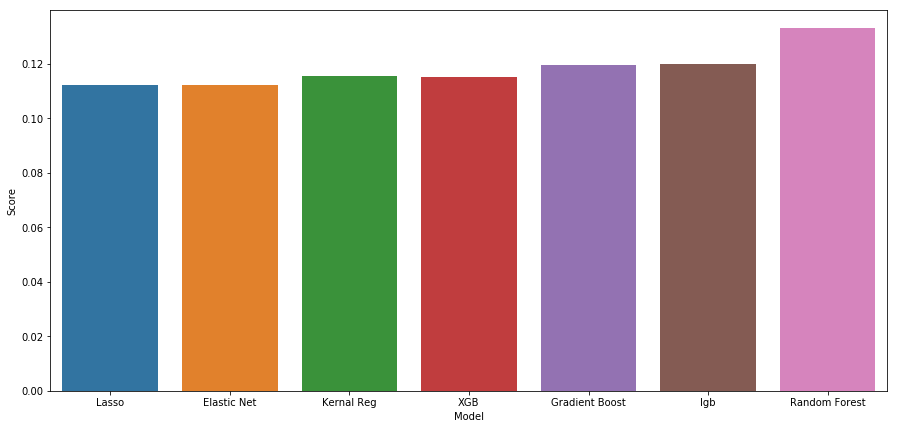

In [86]:
plt.figure(figsize=(15,7))
sns.barplot(scores_df['Model'],scores_df['Score']);

###### Combining models to get better prediction

Ensemble methods are commonly used to boost predictive accuracy by combining the predictions of multiple machine learning models. The traditional wisdom has been to combine so-called “weak” learners. However, a more modern approach is to create an ensemble of a well-chosen collection of strong yet diverse models.

Building powerful ensemble models has many parallels with building successful human teams in business, science, politics, and sports. Each team member makes a significant contribution and individual weaknesses and biases are offset by the strengths of other members.

The simplest kind of ensemble is the unweighted average of the predictions of the models that form a model library. For example, if a model library includes three models for an interval target (as shown in the following figure), the unweighted average would entail dividing the sum of the predicted values of the three candidate models by three. In an unweighted average, each model takes the same weight when an ensemble model is built.

Reference: [https://blogs.sas.com/content/subconsciousmusings/2017/05/18/stacked-ensemble-models-win-data-science-competitions/](http://)

In [87]:
from IPython.display import Image
from IPython.core.display import HTML 
Image(url= "https://blogs.sas.com/content/subconsciousmusings/files/2017/05/weighted-unweighted.png")

In [88]:
ensemble = (Lasso_Predictions + XGB_Predictions + lgb_Predictions + ENet_Predictions +
           forest_reg_Predictions)/5

ensemble

array([123212.41643454, 157680.72024258, 186181.18159842, ...,
       163044.61405498, 118608.02761964, 222585.81789579])

In [90]:
submission=pd.read_csv('data/sample_submission.csv')
submission['SalePrice']= ensemble

In [91]:
submission.head()

,Id,SalePrice
0,1461,123212.416435
1,1462,157680.720243
2,1463,186181.181598
3,1464,197391.640098
4,1465,192066.125030


In [92]:
submission.to_csv('submissiondemo.csv',index=False)